# LIBRARIES

In [2]:
import yfinance as yf
import pandas as pd
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# INPUT TICKER

In [3]:
ticker = input('Type in the ticker of the stock: ')

Type in the ticker of the stock: AMZN


# INPUT START & END DATES TO DOWNLOAD DATA

In [4]:
start_date = input('Start date (YYYY-MM-DD): ')
end_date = input('End date (YYYY-MM-DD): ')

Start date (YYYY-MM-DD): 2021-01-01
End date (YYYY-MM-DD): 2022-12-31


# DOWNLOADING DATA

In [5]:
data = yf.download(ticker,start_date,end_date)
data

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  163.500000  163.600006  157.201004  159.331497  159.331497   
2021-01-05  158.300507  161.169006  158.253006  160.925507  160.925507   
2021-01-06  157.324005  159.875504  156.557999  156.919006  156.919006   
2021-01-07  157.850006  160.427002  157.750000  158.108002  158.108002   
2021-01-08  159.000000  159.531998  157.110001  159.134995  159.134995   
...                ...         ...         ...         ...         ...   
2022-12-23   83.250000   85.779999   82.930000   85.250000   85.250000   
2022-12-27   84.970001   85.349998   83.000000   83.040001   83.040001   
2022-12-28   82.800003   83.480003   81.690002   81.820000   81.820000   
2022-12-29   82.870003   84.550003   82.550003   84.180000   84.180000   
2022-12-30   83.120003   84.050003   82.470001   84.000000   84.000000   

              Volume  
Date                  
2021-01-04  88228000  
2021-01-05  53110000  
2021-01-06  87896000  
2021-01-07  70290000  
2021-01-08  70754000  
...              ...  
2022-12-23  57433700  
2022-12-27  57284000  
2022-12-28  58228600  
2022-12-29  54995900  
2022-12-30  62401200  

[503 rows x 6 columns]

# PLOT

<Axes: xlabel='Date'>

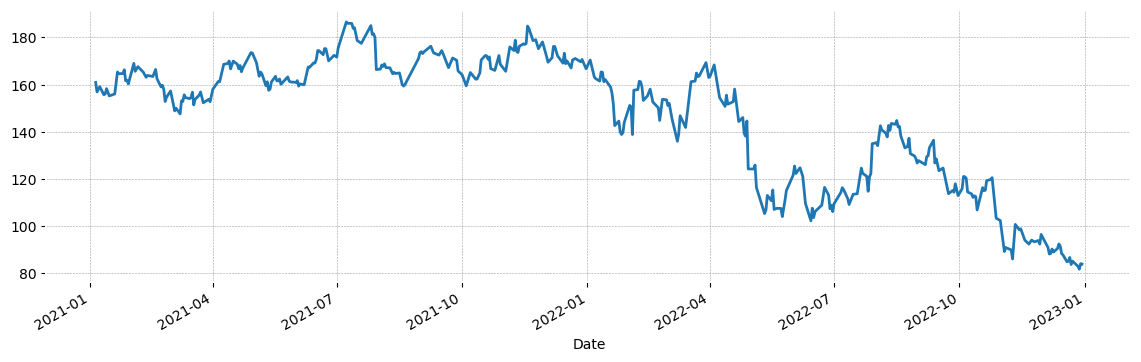

In [48]:
data['Adj Close'].plot(figsize = (14,4))

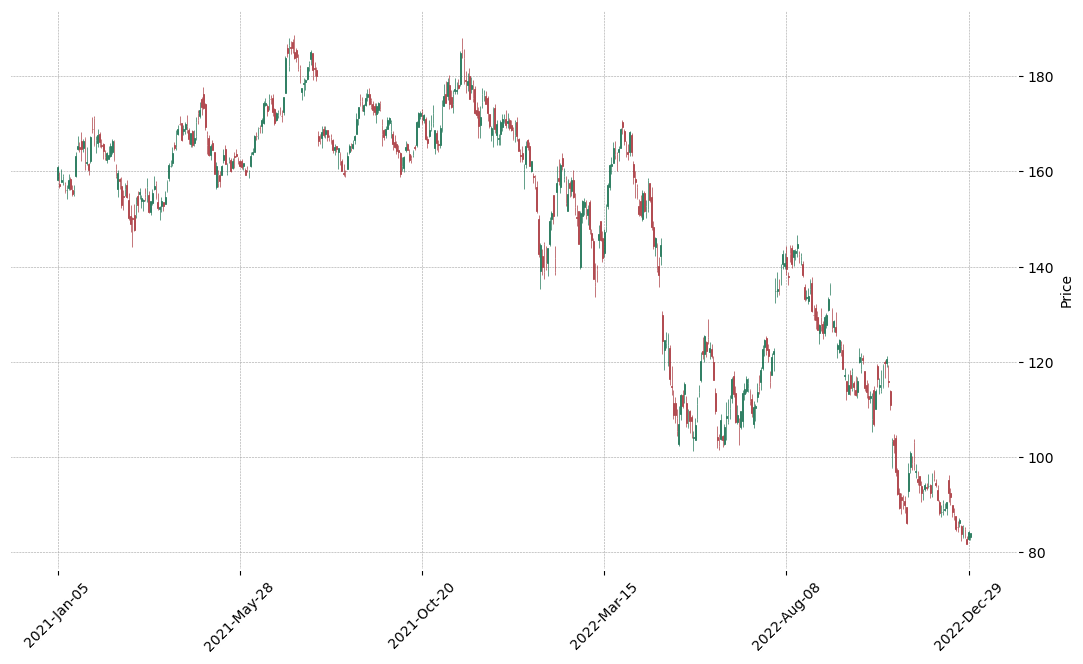

In [47]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
mpf.plot(data,type='candle', style='charles',figsize = (14,8))

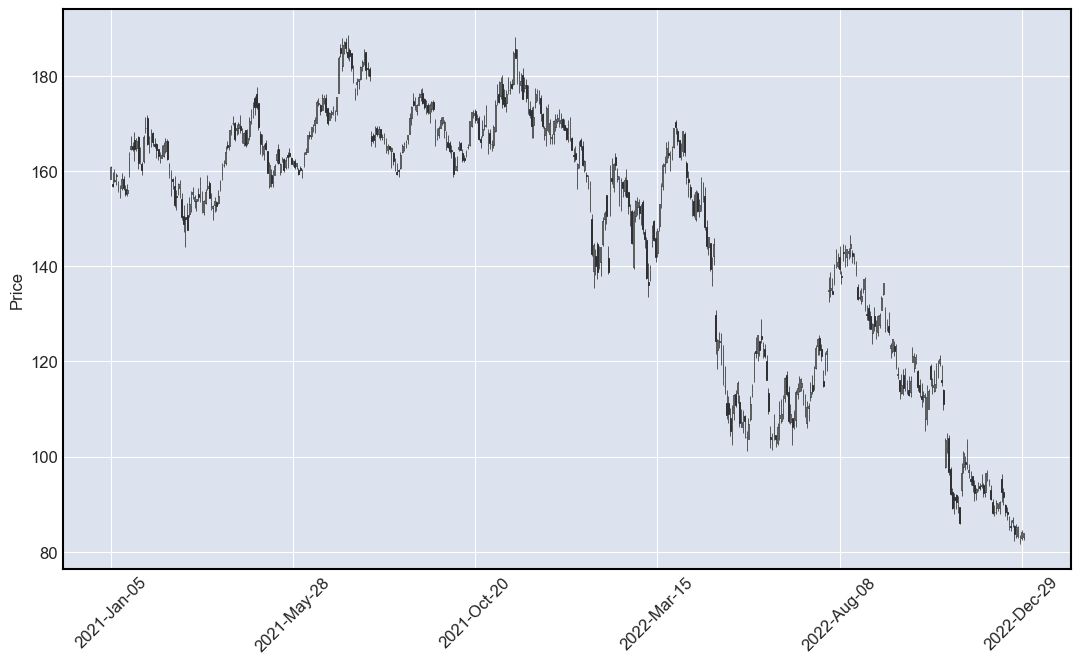

In [46]:
mpf.plot(data,type='candle', figsize = (14,8))

Text(0.5, 1.0, 'Close | Volume | AMZN')

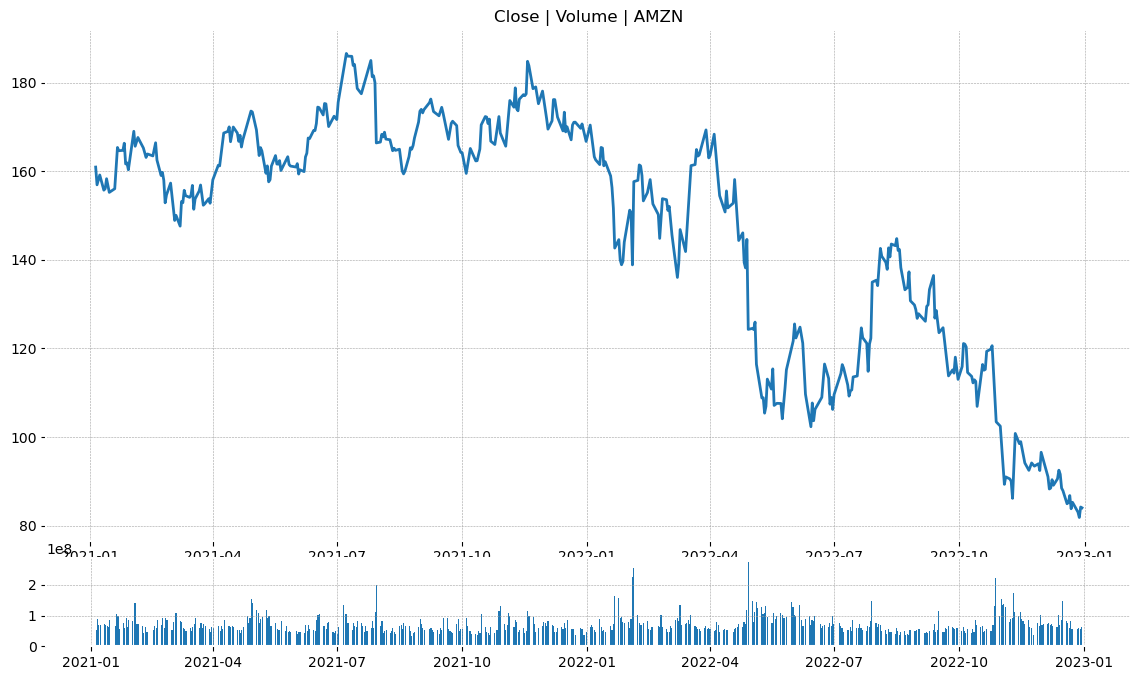

In [50]:
fig = plt.figure(figsize = (14,8))
gs = fig.add_gridspec(nrows = 6, ncols = 1)

ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5, 0])

ax1.plot(data['Adj Close'])
ax2.bar(data.index, data['Volume'])

ax1.set_title('Close | Volume | '+ticker)

# PREPROCESSING

In [10]:
data['Pct_Change'] = data['Adj Close'].pct_change()*100

In [12]:
data.dropna(inplace=True)

In [13]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-05  158.300507  161.169006  158.253006  160.925507  160.925507   
2021-01-06  157.324005  159.875504  156.557999  156.919006  156.919006   
2021-01-07  157.850006  160.427002  157.750000  158.108002  158.108002   
2021-01-08  159.000000  159.531998  157.110001  159.134995  159.134995   
2021-01-11  157.400497  157.819000  155.500000  155.710495  155.710495   
...                ...         ...         ...         ...         ...   
2022-12-23   83.250000   85.779999   82.930000   85.250000   85.250000   
2022-12-27   84.970001   85.349998   83.000000   83.040001   83.040001   
2022-12-28   82.800003   83.480003   81.690002   81.820000   81.820000   
2022-12-29   82.870003   84.550003   82.550003   84.180000   84.180000   
2022-12-30   83.120003   84.050003   82.470001   84.000000   84.000000   

              Volume  Pct_Change  
Date                              
2021-01-05  53110000    1.000436  
2021-01-06  87896000   -2.489661  
2021-01-07  70290000    0.757713  
2021-01-08  70754000    0.649551  
2021-01-11  73668000   -2.151946  
...              ...         ...  
2022-12-23  57433700    1.742450  
2022-12-27  57284000   -2.592374  
2022-12-28  58228600   -1.469173  
2022-12-29  54995900    2.884381  
2022-12-30  62401200   -0.213828  

[502 rows x 7 columns]

<Axes: xlabel='Date'>

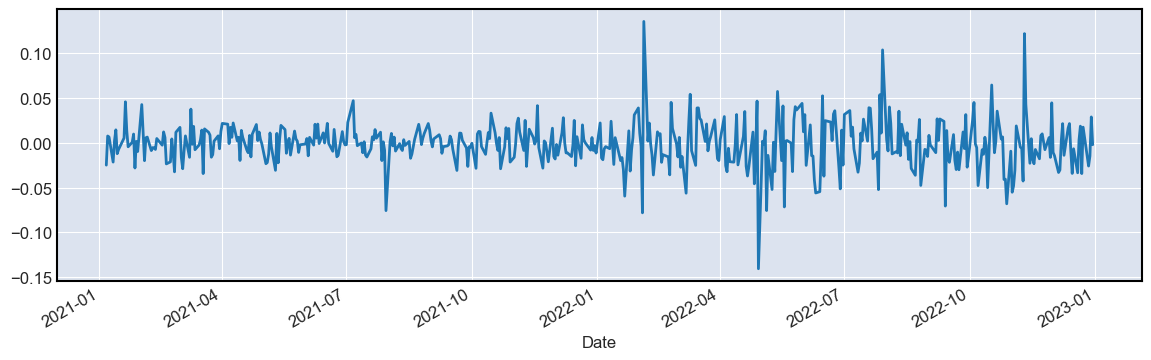

In [44]:
data['Adj Close'].pct_change().plot(figsize = (14,4))

In [15]:
returns = data['Adj Close'].pct_change()

In [16]:
returns.mean()

-0.0009901954137198205

In [17]:
returns.median()

-0.0004621896804161141

# ROLLING MEANS

<Axes: xlabel='Date'>

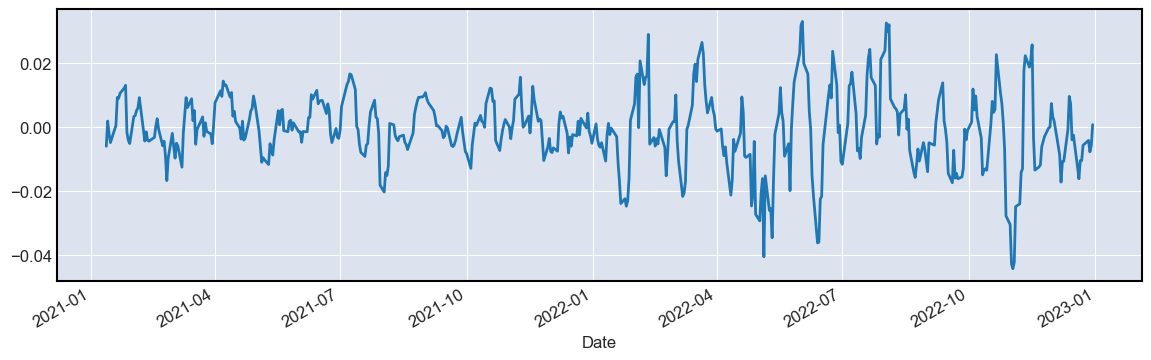

In [43]:
returns.rolling(5).mean().plot(figsize = (14,4))

<Axes: xlabel='Date'>

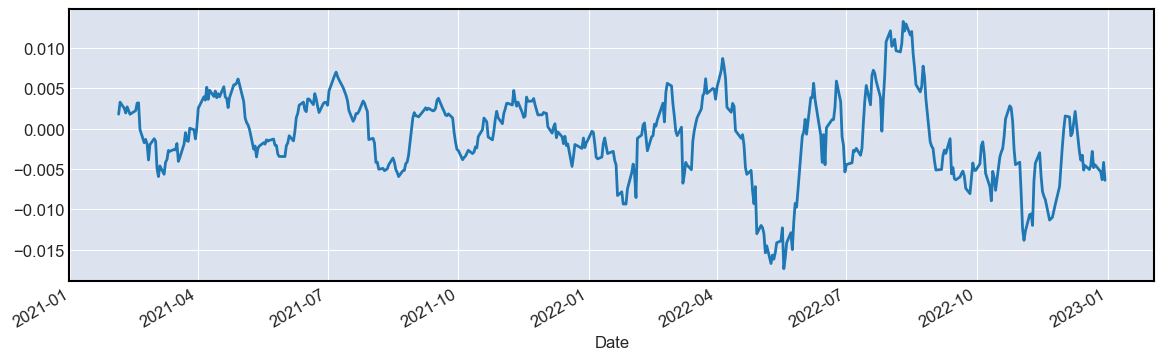

In [42]:
returns.rolling(21).mean().plot(figsize = (14,4))

<Axes: xlabel='Date'>

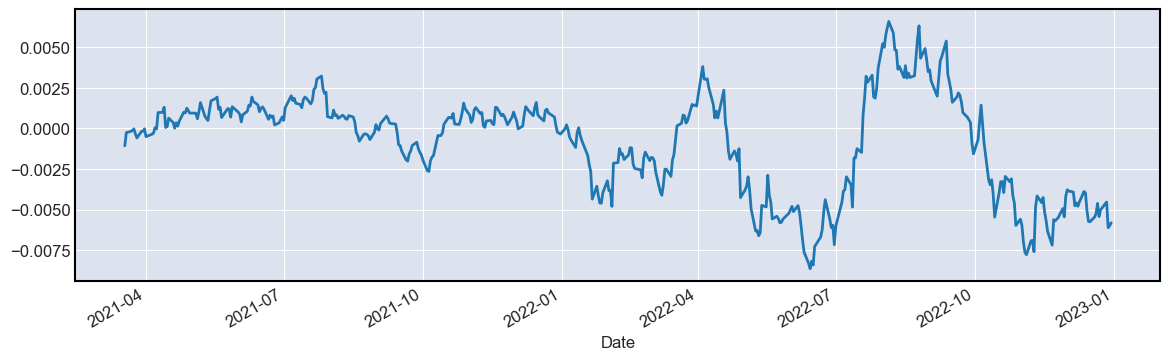

In [41]:
returns.rolling(50).mean().plot(figsize = (14,4))

<Axes: xlabel='Date'>

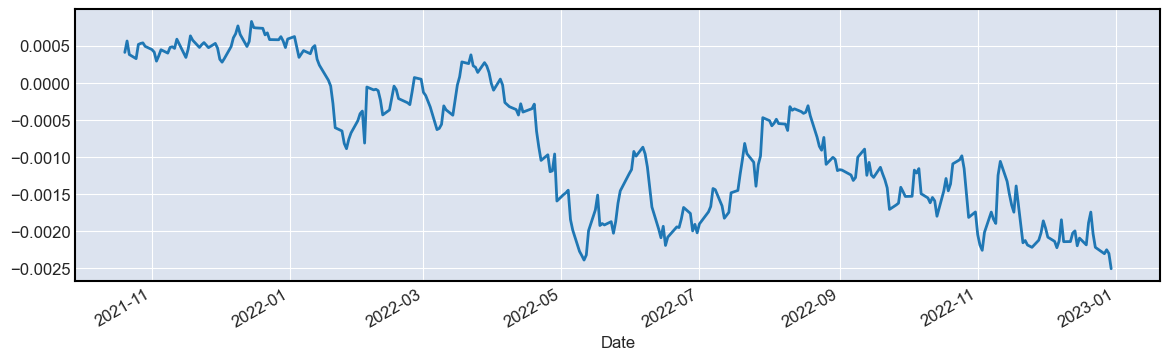

In [40]:
returns.rolling(200).mean().plot(figsize = (14,4))

# VOL

In [27]:
returns.std()

0.024771107906097215

<Axes: xlabel='Date'>

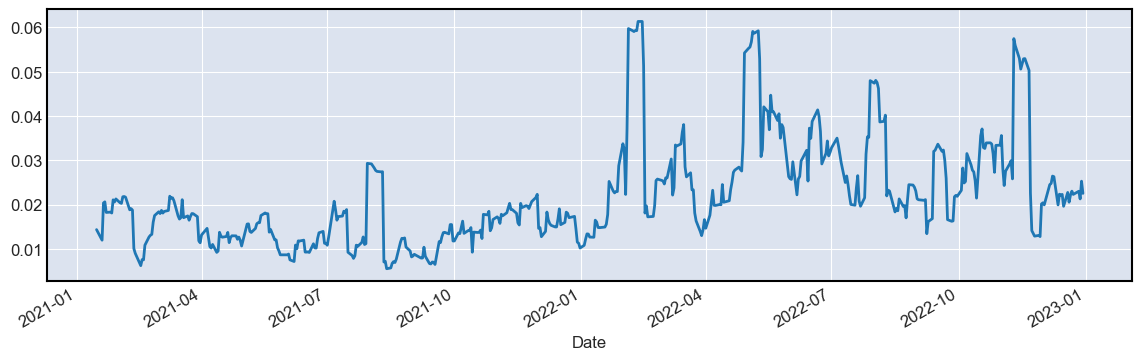

In [39]:
vol_windows = returns.rolling(8).std()
vol_windows.plot(figsize = (14,4))

<Axes: xlabel='Date'>

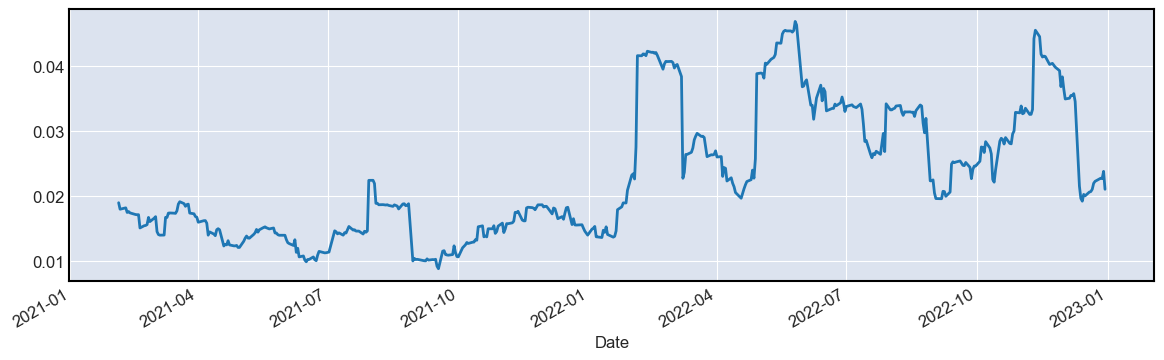

In [38]:
vol_windows = returns.rolling(21).std()
vol_windows.plot(figsize = (14,4))

# DESCRIBE

In [31]:
returns.describe()

count    501.000000
mean      -0.000990
std        0.024771
min       -0.140494
25%       -0.013946
50%       -0.000462
75%        0.011678
max        0.135359
Name: Adj Close, dtype: float64

# DISTRIBUTION

<Axes: ylabel='Frequency'>

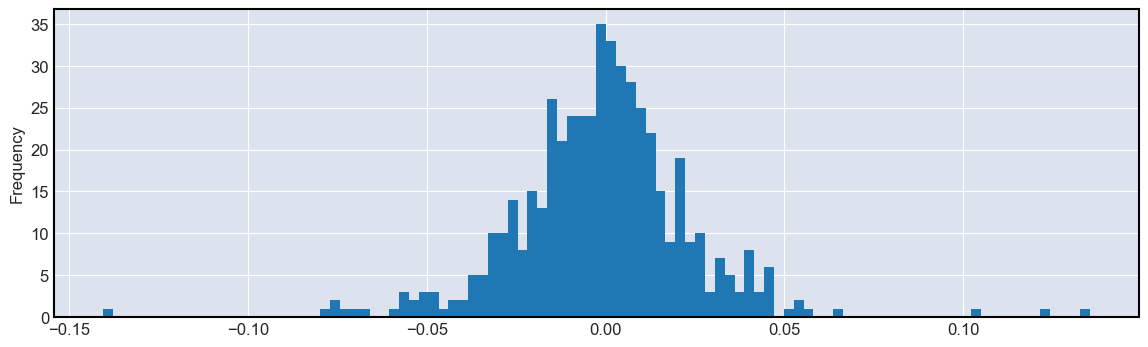

In [37]:
returns.plot.hist(bins = 100,figsize = (14,4))

# ACCUMULATED RETURNS

<Axes: xlabel='Date'>

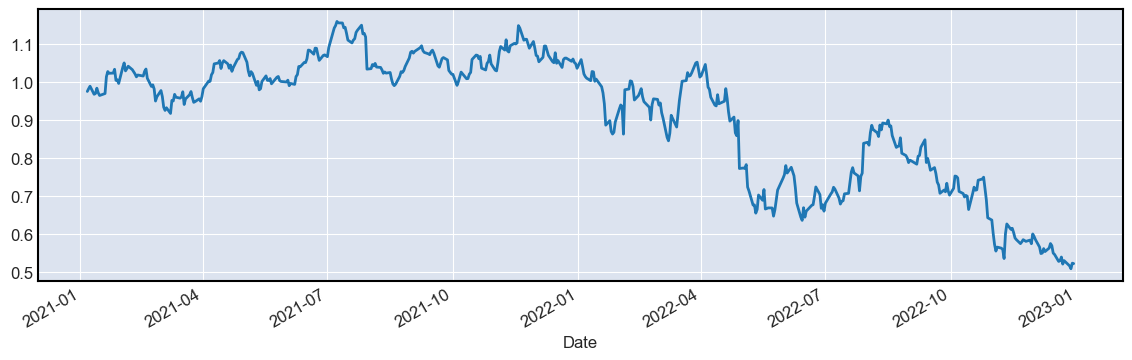

In [36]:
ac_returns = (returns + 1).cumprod()
ac_returns.plot(figsize = (14,4))